# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
#message states using TensorFlow backend
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


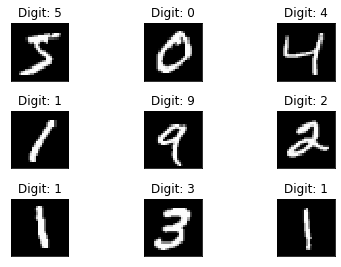

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 20s - loss: 0.2491 - accuracy: 0.9250 - val_loss: 0.1321 - val_accuracy: 0.9572
Epoch 2/20
469/469 - 6s - loss: 0.1016 - accuracy: 0.9688 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 3/20
469/469 - 6s - loss: 0.0727 - accuracy: 0.9767 - val_loss: 0.0779 - val_accuracy: 0.9739
Epoch 4/20
469/469 - 6s - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 5/20
469/469 - 6s - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0703 - val_accuracy: 0.9788
Epoch 6/20
469/469 - 6s - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0637 - val_accuracy: 0.9811
Epoch 7/20
469/469 - 6s - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 8/20
469/469 - 6s - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0627 - val_accuracy: 0.9819
Epoch 9/20
469/469 - 6s - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0666 - val_accuracy: 0.9819
Epoch 10/20
469/469 - 5s - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0699 - val_accuracy: 0.983

In [ ]:
model.save('mnist.h5')  #tflite

In [ ]:
mnist_model = load_model('mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0759 - accuracy: 0.9839
Test Loss 0.07591771334409714
Test Accuracy 0.9839000105857849
